# Linear Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # Labels with noise

# Linear Regression from scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = 0  # Initialize weight
        self.b = 0  # Initialize bias

    def predict(self, X):
        """Compute predictions."""
        return self.w * X + self.b

    def compute_loss(self, y, y_pred):
        """Compute Mean Squared Error."""
        return np.mean((y - y_pred) ** 2)

    def fit(self, X, y):
        """Train the model using gradient descent."""
        n = len(y)
        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            loss = self.compute_loss(y, y_pred)

            # Compute gradients
            dw = (-2 / n) * np.sum(X * (y - y_pred))
            db = (-2 / n) * np.sum(y - y_pred)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def get_parameters(self):
        """Return learned parameters."""
        return self.w, self.b

# Initialize and train the model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print learned parameters
w, b = model.get_parameters()
print(f"Learned parameters -> Weight (w): {w:.2f}, Bias (b): {b:.2f}")


theta: [[0.01668064]
 [1.45712269]]
Intercept: 0.016680640294483472
Slope: 1.4571226933706753
Predictions: [[0.01668064]
 [2.93092603]]


# Logistic Regression

In [15]:
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 1)  # 100 data points with 1 feature
y = (X > 0).astype(int)  # Labels: 1 if X > 0, else 0

# Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None  # Weights
        self.b = 0     # Bias

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        """Compute probabilities."""
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X):
        """Predict binary labels."""
        return (self.predict_proba(X) >= 0.5).astype(int)

    def compute_loss(self, y, y_pred):
        """Compute binary cross-entropy loss."""
        return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

    def fit(self, X, y):
        """Train the model using gradient descent."""
        n_samples, n_features = X.shape
        self.w = np.zeros((n_features,))  # Initialize weights

        for epoch in range(self.epochs):
            # Compute predictions
            y_pred = self.predict_proba(X)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # Compute loss for monitoring
            if epoch % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def get_parameters(self):
        """Return learned weights and bias."""
        return self.w, self.b

# Initialize and train the model
model = LogisticRegressionScratch(learning_rate=0.1, epochs=1000)
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

# Print learned parameters
w, b = model.get_parameters()
print(f"Learned parameters -> Weight (w): {w}, Bias (b): {b}")


Accuracy: 95.00%
Learned Parameters (Theta): [-3.41273512  4.0121878   2.55071284]


#K-Means


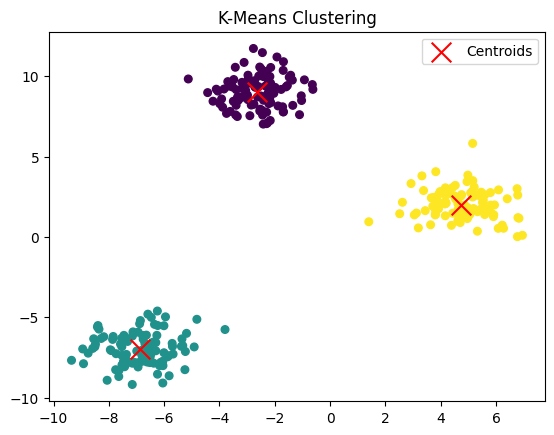

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
X = np.vstack((
    np.random.normal([2, 2], 0.5, size=(50, 2)),
    np.random.normal([6, 6], 0.5, size=(50, 2)),
    np.random.normal([10, 2], 0.5, size=(50, 2))
))

# K-Means from scratch
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def initialize_centroids(self, X):
        """Randomly initialize centroids."""
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[indices]

    def compute_distance(self, X, centroids):
        """Compute Euclidean distance."""
        return np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))

    def assign_clusters(self, X, centroids):
        """Assign each point to the nearest centroid."""
        distances = self.compute_distance(X, cent


# K-nearest Neighbors

In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# KNN Implementation from Scratch
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """Store the training data."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Predict labels for the input data."""
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        """Predict the label for a single input."""
        # Compute distances to all training points
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]

        # Find the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k nearest neighbors
        k_labels = [self.y_train[i] for i in k_indices]

        # Return the most common label
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
k = 3
knn = KNearestNeighbors(k=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy with k={k}: {accuracy:.2f}")
